In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/listings (7).csv')


In [5]:
print("rows is",df.shape[0])
print("columns is",df.shape[1])

rows is 37765
columns is 18


In [6]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,NaN
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.787780,-73.947590,Private room,65.0,30,247,2024-03-06,1.38,1,212,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37760,1192946306020922085,Private Studio in Brooklyn,137493949,Sydney,Brooklyn,Clinton Hill,40.684009,-73.967850,Entire home/apt,95.0,30,0,NaN,NaN,1,37,0,NaN
37761,1193005542763264121,Skyline Views from MSG Penthouse,559434422,Luis,Manhattan,Chelsea,40.751493,-73.996157,Entire home/apt,599.0,30,0,NaN,NaN,1,269,0,NaN
37762,1193016130087171760,Stunning designer Chelsea studio on the best b...,35491667,Nat,Manhattan,Chelsea,40.741720,-74.002750,Entire home/apt,75.0,30,0,NaN,NaN,80,242,0,NaN
37763,1193068036013405081,Sunny & Spacious in Queens,20380663,Anastasios,Queens,Elmhurst,40.731090,-73.878070,Entire home/apt,96.0,30,0,NaN,NaN,2,365,0,NaN


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
#checking datatypes and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37765 non-null  int64  
 1   name                            37763 non-null  object 
 2   host_id                         37765 non-null  int64  
 3   host_name                       37760 non-null  object 
 4   neighbourhood_group             37765 non-null  object 
 5   neighbourhood                   37765 non-null  object 
 6   latitude                        37765 non-null  float64
 7   longitude                       37765 non-null  float64
 8   room_type                       37765 non-null  object 
 9   price                           23044 non-null  float64
 10  minimum_nights                  37765 non-null  int64  
 11  number_of_reviews               37765 non-null  int64  
 12  last_review                     

In [9]:
#Checking Null values in all columns
df.isnull().sum()/len(df)*100

,0
id,0.000000
name,0.005296
host_id,0.000000
host_name,0.013240
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,38.980538


In [10]:
#checking all columns descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,37765.0,3.653038e+17,4.539908e+17,2595.000000,2.055254e+07,4.826382e+07,8.276380e+17,1.193086e+18
host_id,37765.0,1.659684e+08,1.800529e+08,1678.000000,1.662776e+07,8.218953e+07,3.031569e+08,5.869174e+08
latitude,37765.0,4.072907e+01,5.634298e-02,40.500366,4.068880e+01,4.072644e+01,4.076247e+01,4.091139e+01
longitude,37765.0,-7.394708e+01,5.445777e-02,-74.251907,-7.398322e+01,-7.395454e+01,-7.392802e+01,-7.371365e+01
price,23044.0,2.210749e+02,7.666210e+02,8.000000,8.600000e+01,1.500000e+02,2.500000e+02,1.000000e+05
minimum_nights,37765.0,2.916460e+01,3.020254e+01,1.000000,3.000000e+01,3.000000e+01,3.000000e+01,1.250000e+03
number_of_reviews,37765.0,2.489898e+01,5.880212e+01,0.000000,0.000000e+00,3.000000e+00,2.100000e+01,1.915000e+03
reviews_per_month,26014.0,9.055439e-01,1.860784e+00,0.010000,9.000000e-02,3.200000e-01,1.130000e+00,1.035300e+02
calculated_host_listings_count,37765.0,5.376303e+01,1.619797e+02,1.000000,1.000000e+00,2.000000e+00,8.000000e+00,8.420000e+02
availability_365,37765.0,1.524116e+02,1.427973e+02,0.000000,0.000000e+00,1.260000e+02,3.010000e+02,3.650000e+02


In [11]:
#hecking categorical columns descriptive statistics
df.describe(include='object').T

,count,unique,top,freq
name,37763,36050,Water View King Bed Hotel Room,30
host_name,37760,8534,Blueground,842
neighbourhood_group,37765,5,Manhattan,16715
neighbourhood,37765,225,Bedford-Stuyvesant,2709
room_type,37765,4,Entire home/apt,20023
last_review,26014,3059,2024-07-01,341
license,5171,1732,Exempt,2872


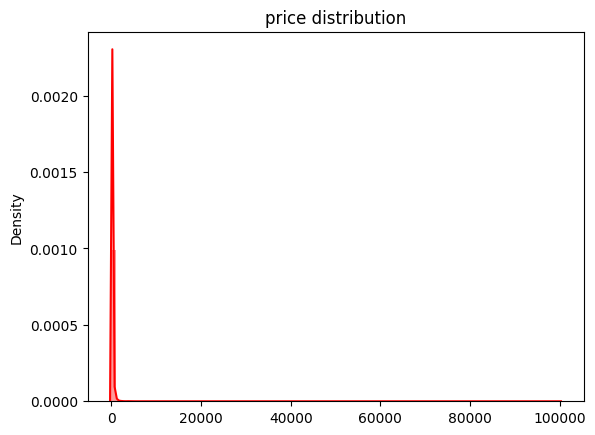

In [12]:
#checking Distribution of Price columns.
sns.distplot( x=df['price'], color = 'Red', bins=100).set_title('price distribution')
plt.show()

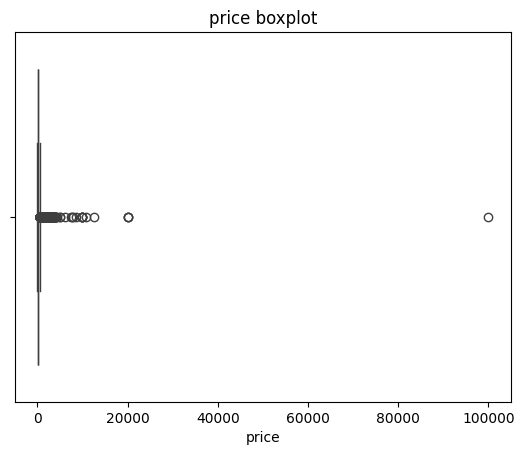

In [13]:
#checking outliers and spread of the price column
sns.boxplot(x=df['price']).set_title('price boxplot')
plt.show()

In [14]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,16715
Brooklyn,13885
Queens,5579
Bronx,1227
Staten Island,359


In [46]:
#MIssing value handling with replacing values with median values of each neighbourhood and room_type
mean_price_shared_Bronx = df[(df['room_type'] == 'Private room') & (df['neighbourhood_group'] == 'Queens')]['price'].median()
df.loc[(df['room_type'] == 'Private room') & (df['neighbourhood_group'] == 'Queens') & df['price'].isnull(), 'price'] = mean_price_shared_Bronx


In [ ]:
mean_price_shared_manhattan = df[(df['room_type'] == 'Shared room') & (df['neighbourhood_group'] == 'Manhattan')]['price'].mean()
df.loc[(df['room_type'] == 'Shared room') & (df['neighbourhood_group'] == 'Manhattan') & df['price'].isnull(), 'price'] = mean_price_shared_manhattan

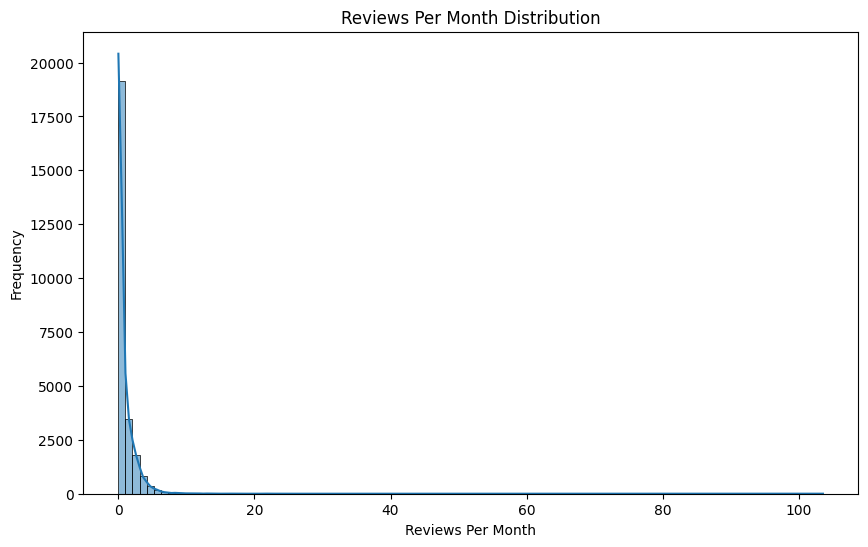

In [49]:
#checking Distribution of review_per_month
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=100, kde=True)
plt.xlabel('Reviews Per Month')
plt.ylabel('Frequency')
plt.title('Reviews Per Month Distribution')
plt.show()

In [50]:
#missing value replacing with median
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

In [51]:
#checking distribution for categorical clumns
room_type_counts = df['room_type'].value_counts()
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Room Type ', 'Neighbourhood'])

fig.add_trace(go.Pie(labels=room_type_counts.index, values=room_type_counts.values),1, 1)
fig.add_trace(go.Pie(labels=neighbourhood_group_counts.index, values=neighbourhood_group_counts.values),1, 2)
fig.update_layout(
    title_text="Room_types And Neighbourhood",
    annotations=[dict( x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

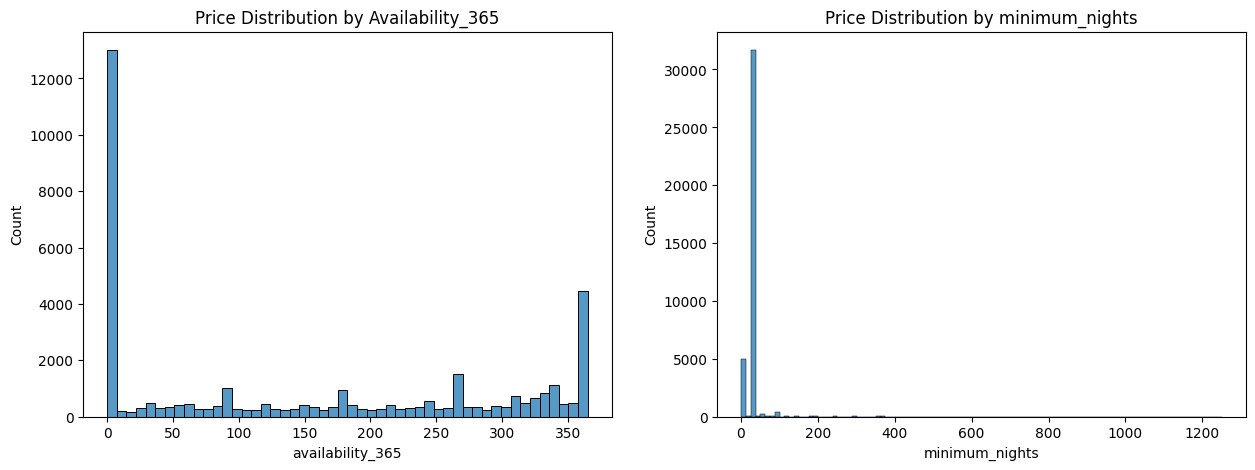

In [52]:
#checking distribution of availability_365 and minimim_nights
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15, 5))
sns.histplot(x='availability_365',ax=axes[0],data=df, bins =50).set_title('Price Distribution by Availability_365')
sns.histplot(x='minimum_nights',bins = 100 , ax=axes[1], data=df).set_title('Price Distribution by minimum_nights')
plt.show()

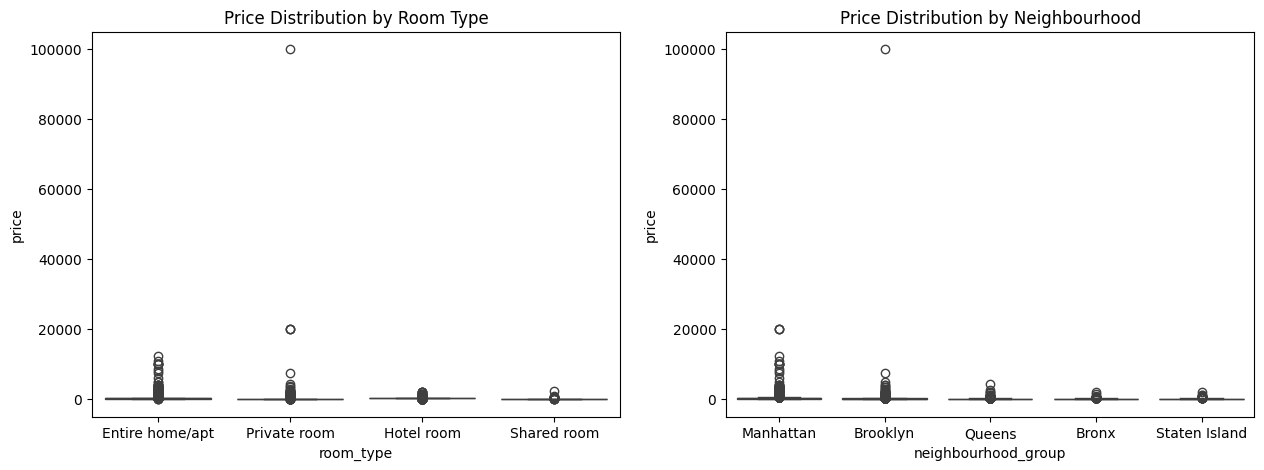

In [53]:
#checking outliers and spread of room_types and neighbourhood
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15, 5))
sns.boxplot(x='room_type', y='price', ax=axes[0],data=df).set_title('Price Distribution by Room Type')
sns.boxplot(x='neighbourhood_group', y='price', ax=axes[1], data=df).set_title('Price Distribution by Neighbourhood')
plt.show()

In [54]:
# handling oulers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [55]:
df.loc[df['price'] < lower_bound, 'price'] = lower_bound
df.loc[df['price'] > upper_bound, 'price'] = upper_bound

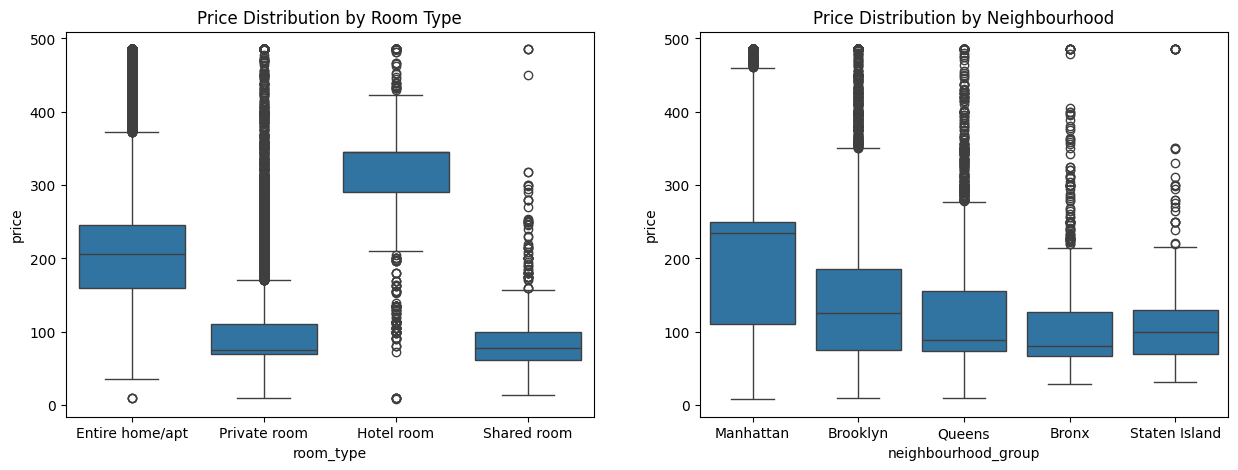

In [56]:
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15, 5))
sns.boxplot(x='room_type', y='price', ax=axes[0],data=df).set_title('Price Distribution by Room Type')
sns.boxplot(x='neighbourhood_group', y='price', ax=axes[1], data=df).set_title('Price Distribution by Neighbourhood')
plt.show()

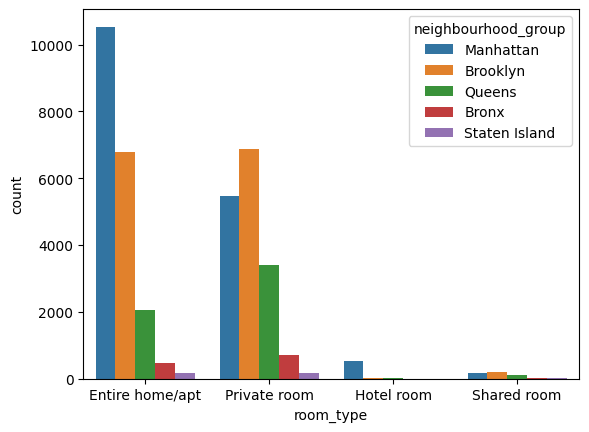

In [57]:
#counts of Room_type Vs Neighbourhood
sns.countplot(x='room_type',data=df,  hue= 'neighbourhood_group')
plt.show()

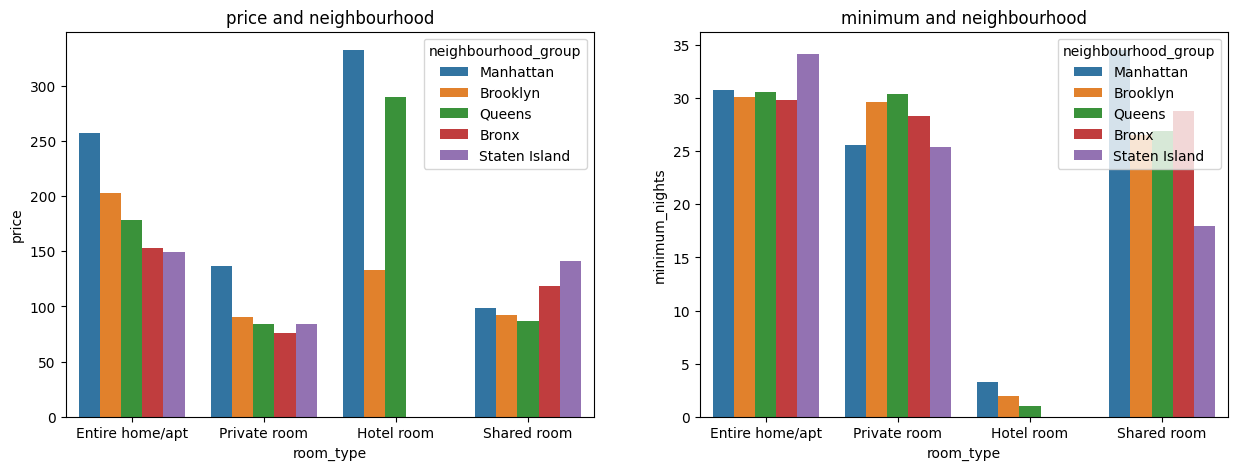

In [58]:
# checking impacts of neighbourhood price and minimim_nights
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15, 5))
sns.barplot(x='room_type',y='price',data=df,ax=axes[0], ci=None,  hue= 'neighbourhood_group').set_title('price and neighbourhood')
sns.barplot(x='room_type',y='minimum_nights',data=df,ax=axes[1], ci=None, hue= 'neighbourhood_group').set_title('minimum and neighbourhood')
plt.show()

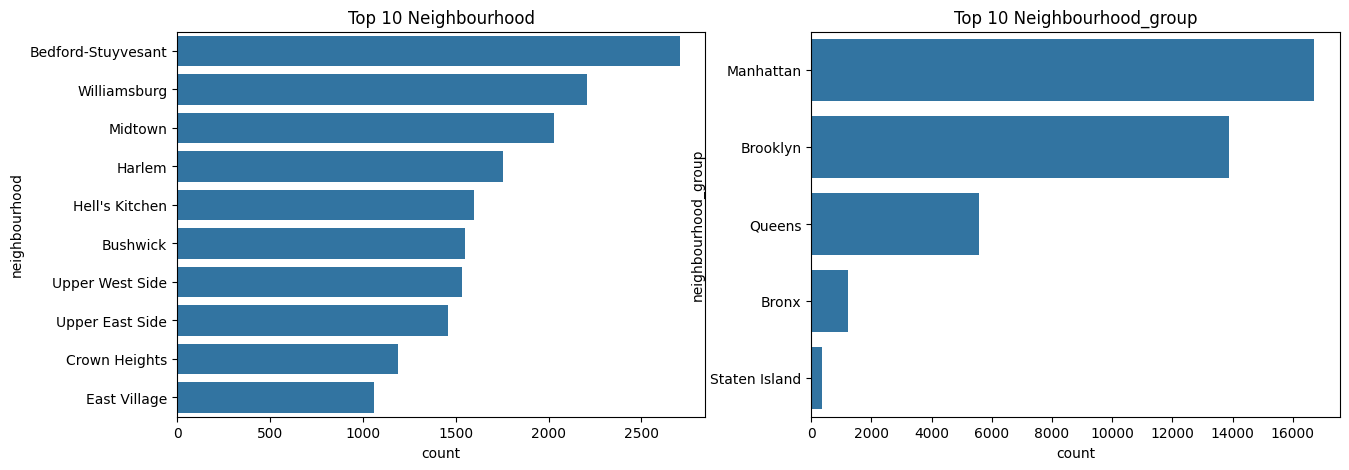

In [59]:
#top 10 host_name with their neighbourhood_group
top_10n = df.groupby('neighbourhood')['host_id'].count().rename('count').reset_index().sort_values('count', ascending=False)
top_10 = top_10n.head(10)
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15, 5))
sns.barplot(y='neighbourhood', x='count',ax=axes[0], data=top_10).set_title('Top 10 Neighbourhood')
sns.countplot(y='neighbourhood_group',ax=axes[1], data=df).set_title('Top 10 Neighbourhood_group')
plt.show()

In [71]:
df.loc[(df['minimum_nights'] < 30) & (df['room_type'] == 'Entire home/apt'), 'minimum_nights'] = 30

In [72]:
df.loc[(df['minimum_nights'] > 60) & (df['room_type'] == 'Entire home/apt'), 'minimum_nights'] = 30

In [73]:
df.loc[(df['minimum_nights'] == 1) & (df['room_type'] == 'Shared room'), 'minimum_nights'] = 5

In [74]:
df.loc[(df['minimum_nights'] >=60) & (df['room_type'] == 'Hotel room'), 'minimum_nights'] = 2

In [75]:
df.loc[(df['minimum_nights'] ==1) & (df['room_type'] == 'Private room'), 'minimum_nights'] = 7

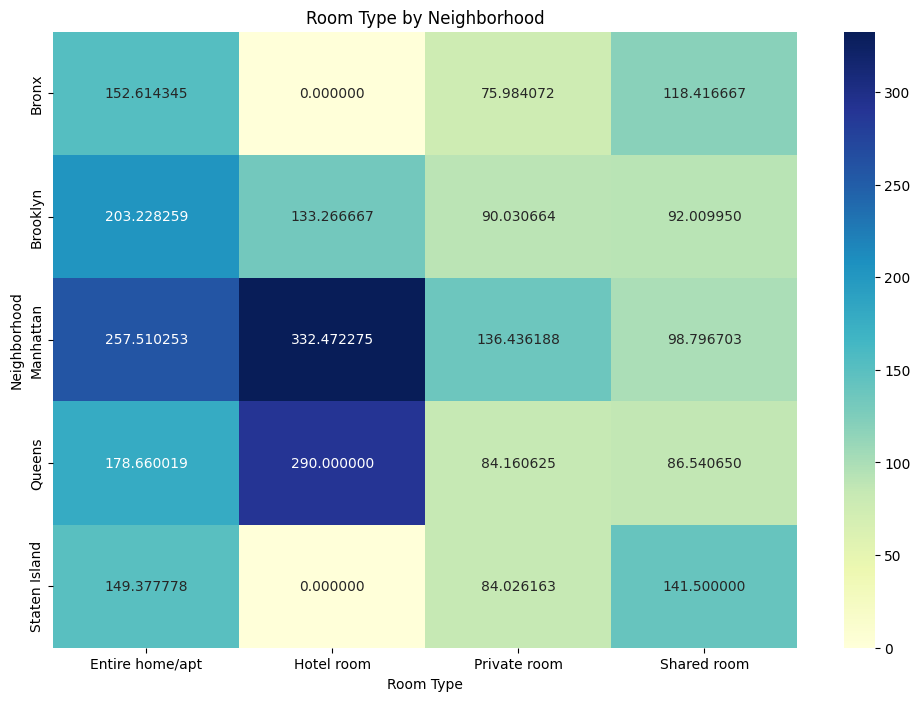

In [76]:
# checking average price of Neighbourhood and room_type
heatmap_data = df.pivot_table(index='neighbourhood_group', columns='room_type', values='price',fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='f', cmap='YlGnBu')
plt.title('Room Type by Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.show()

In [77]:
df[(df['room_type'] == 'Hotel room') & (df['neighbourhood_group'] == 'Queens')]['price'].mean()

290.0

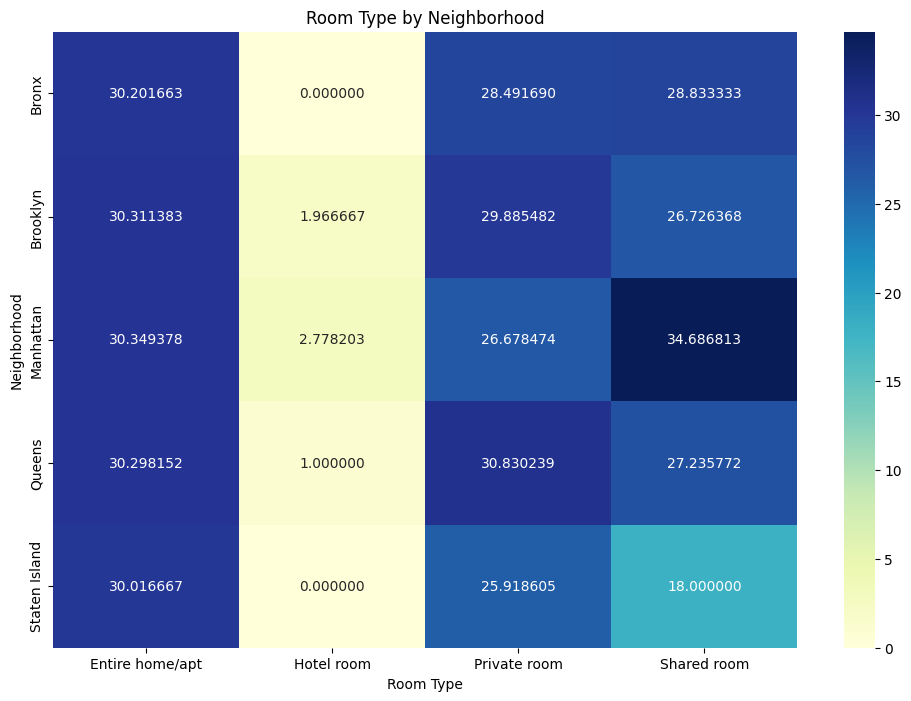

In [78]:
heatmap_data = df.pivot_table(index='neighbourhood_group', columns='room_type', values='minimum_nights',fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='f', cmap='YlGnBu')
plt.title('Room Type by Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.show()

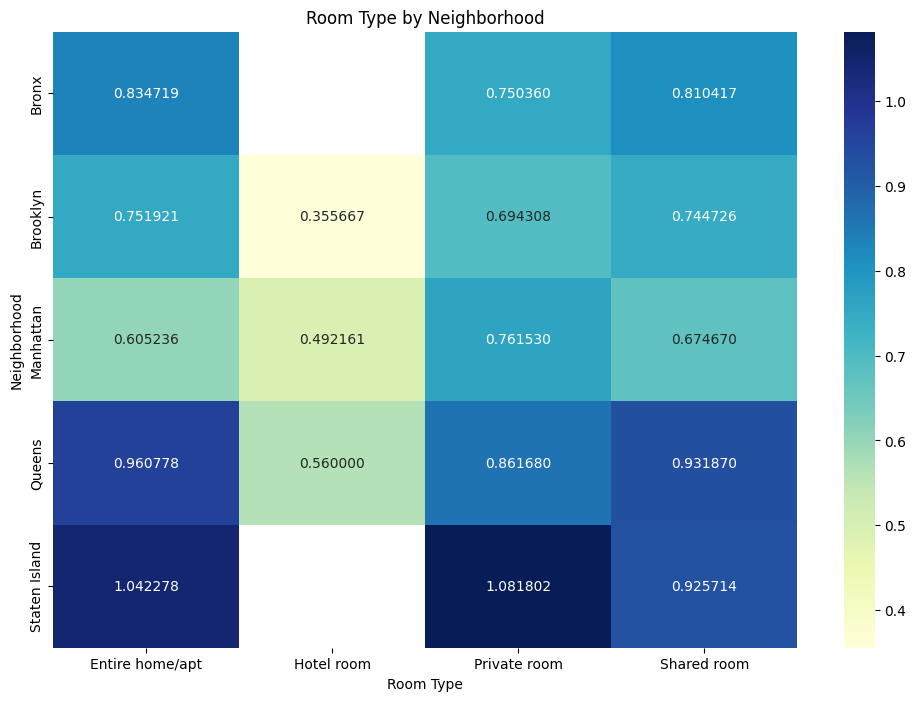

In [79]:
# Checking review_per_month with Neighbourhood and Room_type
heatmap_data = df.pivot_table(index='neighbourhood_group', columns='room_type', values='reviews_per_month')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='f', cmap='YlGnBu')
plt.title('Room Type by Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.show()

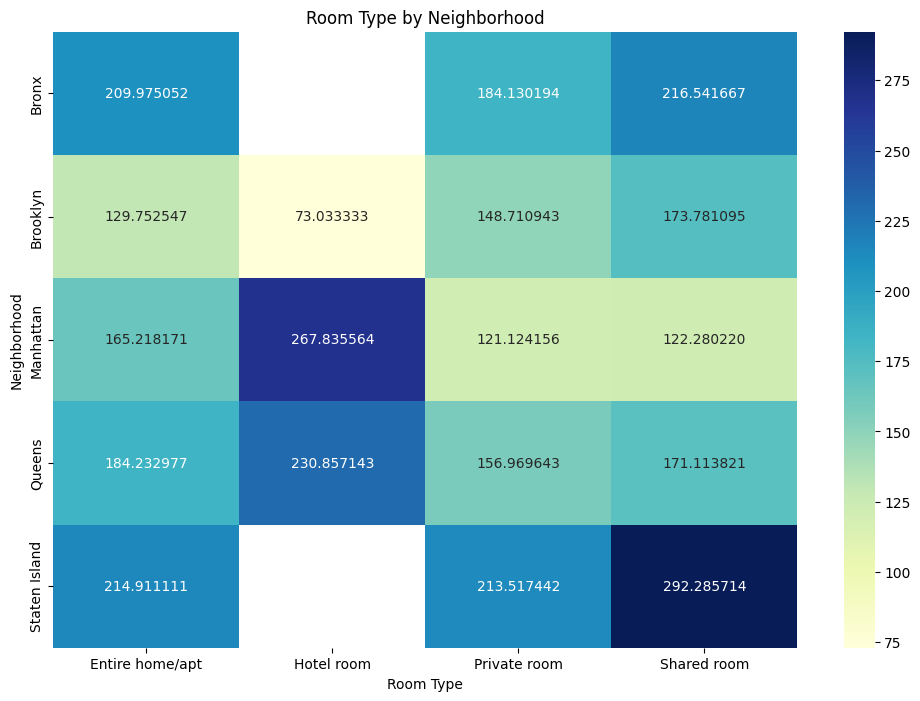

In [80]:
#checking the Average Availabilty_365 with neighbourhood and room_type
heatmap_data = df.pivot_table(index='neighbourhood_group', columns='room_type', values='availability_365')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='f', cmap='YlGnBu')
plt.title('Room Type by Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.show()

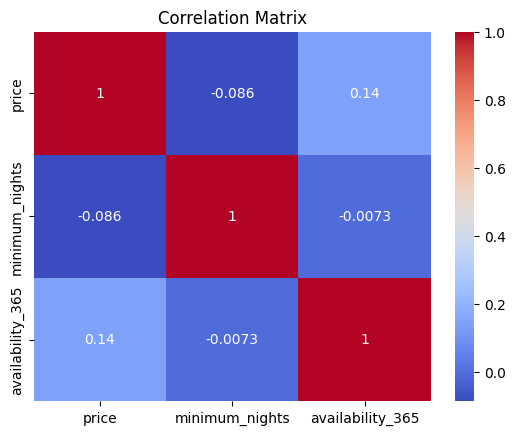

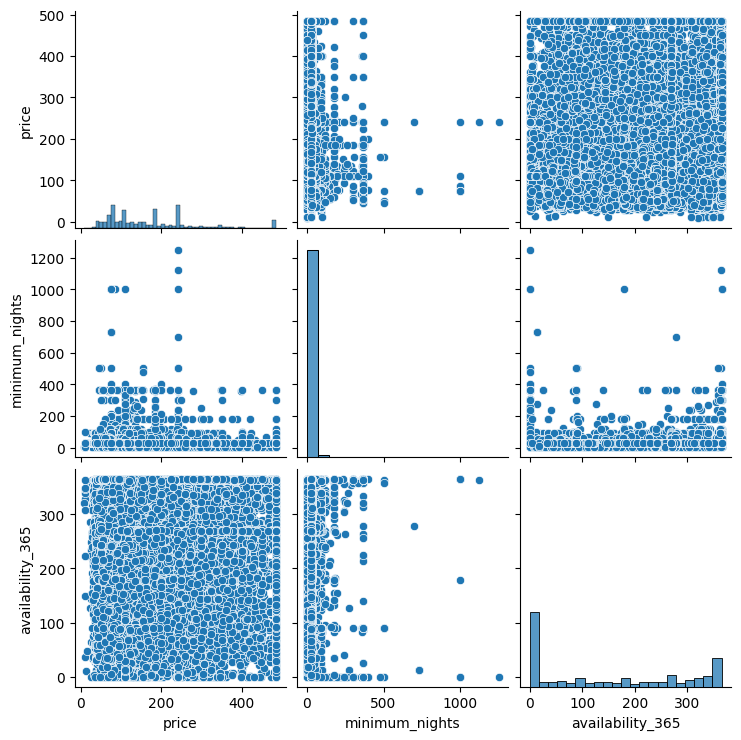

In [65]:
#checking correlation between price, minimum_noights, aviability
corr_matrix = df[['price', 'minimum_nights', 'availability_365']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['price', 'minimum_nights', 'availability_365']])
plt.show()


In [81]:

top_host = df.groupby(['neighbourhood_group', 'host_name'])['host_id'].count().rename('count').reset_index().sort_values('count', ascending=False).head(10)


In [ ]:
#Top host_name host_id in neighbourhood
top_host.pivot_table(index='neighbourhood_group', columns='host_name', values='count').fillna(0)

host_name,Blueground,Elena,Eugene,Hiroki,Jeniffer,Kristina,LuxurybookingsFZE,Michael,RoomPicks,Urban Furnished
neighbourhood_group,,,,,,,,,,
Brooklyn,0.0,0.0,588.0,0.0,0.0,186.0,0.0,0.0,0.0,0.0
Manhattan,781.0,323.0,0.0,0.0,202.0,0.0,329.0,185.0,352.0,228.0
Queens,0.0,0.0,0.0,193.0,0.0,0.0,0.0,0.0,0.0,0.0


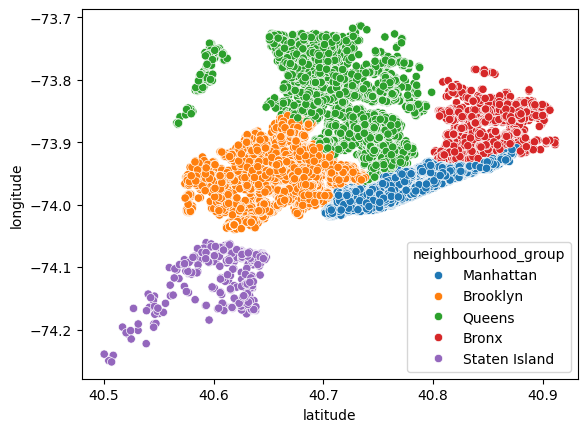

In [82]:
#checking logitude and latitude of host
sns.scatterplot(x='latitude',y='longitude',hue = 'neighbourhood_group', data=df)
plt.show()

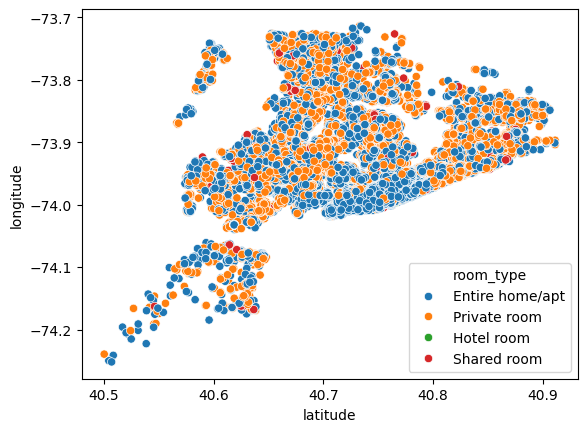

In [83]:
#checking logitude and latitude of host with room_type
sns.scatterplot(x='latitude',y='longitude',hue = 'room_type', data=df)
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

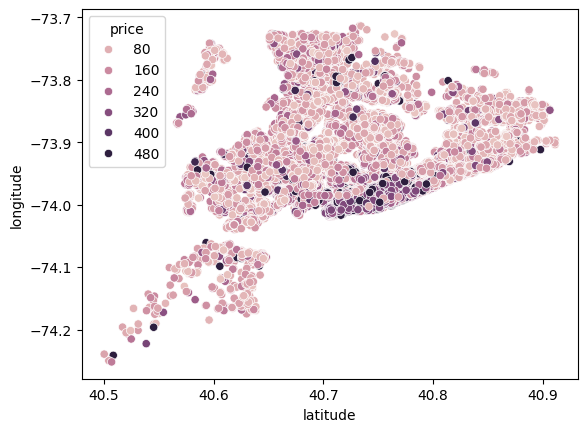

In [84]:
sns.scatterplot(x='latitude',y='longitude',hue = 'price', data=df)